In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_csv("AirPassengers.csv")

In [3]:
df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)

In [6]:
df.isnull().sum()

#Passengers    0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.plot

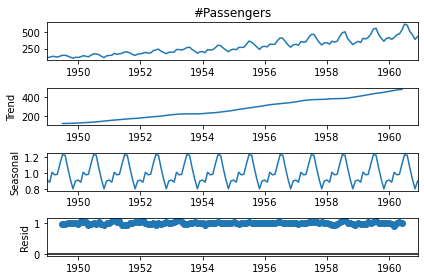

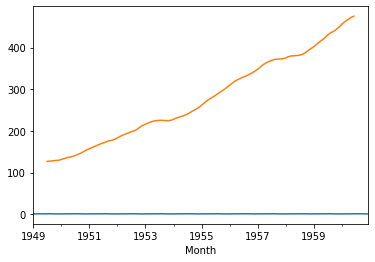

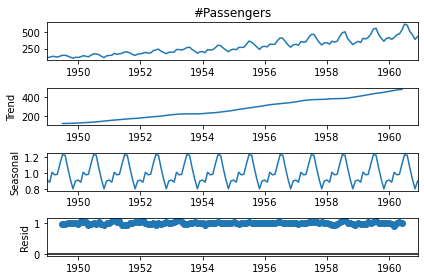

In [9]:
result=seasonal_decompose(df['#Passengers'],model='multiplicable',period=12)
result.seasonal.plot()
result.trend.plot()
result.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller
import plotly.express as px

In [12]:
from matplotlib import pyplot

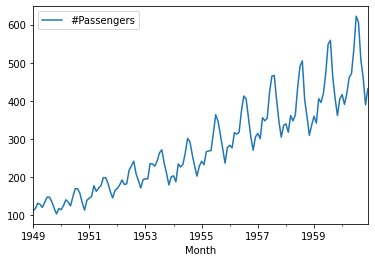

In [14]:
df.plot()

In [15]:
pyplot.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
import plotly.express as px


In [20]:
df=pd.read_csv("AirPassengers.csv")
#df.set_index('Date',inplace=True)
df.Month=pd.to_datetime(df.Month)

series = df.loc[:, '#Passengers'].values
fig = px.line(df, x='Month', y='#Passengers')
fig.show()

In [21]:
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-values: {result[1]}')
for key, value in result[4].items():
  print('Critial Values:')
  print(f'{key},{value}')

ADF Statistic: 0.8153688792060472
n_lags: 0.991880243437641
p-values: 0.991880243437641
Critial Values:
1%,-3.4816817173418295
Critial Values:
5%,-2.8840418343195267
Critial Values:
10%,-2.578770059171598


In [22]:
from statsmodels.tsa.stattools import kpss

In [23]:
kpsstest= kpss(series, regression='c')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [24]:
kpsstest= kpss(series, regression='c')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [25]:
kpss_output=pd.Series(kpsstest[0:3], index=['Test Statistical','p-value','Lags Used'])
for key,value in kpsstest[3].items():
  kpss_output['Critical Value (%s)' %key]=value
print(kpss_output)

Test Statistical          1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
